In [12]:
# Read the Excel file into a pandas DataFrame
import pandas as pd
df = pd.read_excel('1.0-communities.xlsx')

# Convert NaN values to 0
df.fillna(0, inplace=True)


In [2]:
#TN
tennessee = df[df['State/Territory'] == "Tennessee"]
column_sum_TN = tennessee['Expected agricultural loss rate (Natural Hazards Risk Index)'].sum()


In [3]:
#US
column_sum_US = df['Expected agricultural loss rate (Natural Hazards Risk Index)'].sum()


In [5]:
#SOUTHEAST STATES
df_state = df.groupby('State/Territory').sum()

#let's sum the southeast states
df_southeast = df_state.loc[['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia']]

column_sum_southeast = df_southeast['Expected agricultural loss rate (Natural Hazards Risk Index)'].sum()


In [6]:
#Davidson County

davidson_rows = df[df['County Name'] == 'Davidson County']

davidson_rows_updated = davidson_rows[davidson_rows['State/Territory'] == 'Tennessee']

column_sum_davidson = davidson_rows_updated['Expected agricultural loss rate (Natural Hazards Risk Index)'].sum()

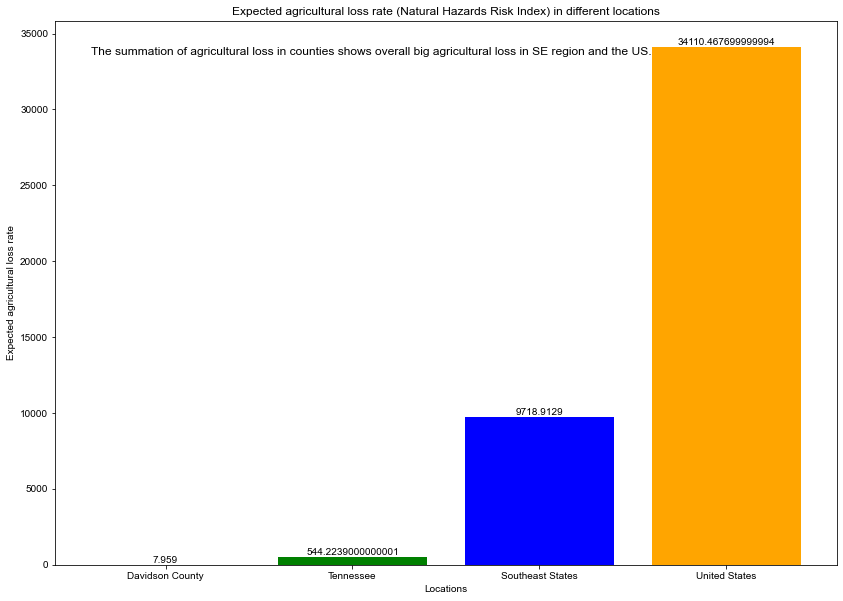

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the four float numbers
numbers = [column_sum_davidson, column_sum_TN, column_sum_southeast, column_sum_US]
labels = ['Davidson County', 'Tennessee', 'Southeast States', 'United States']

# Create a DataFrame from the numbers with labels
df = pd.DataFrame(numbers, columns=['Values'], index=labels)

# Set the figure size
plt.figure(figsize=(14, 10))

# Define colors for each bar that are color-blind friendly
colors = ['red', 'green', 'blue', 'orange']

# Create a bar plot with different colors
plt.bar(df.index, df['Values'], color=colors)

# Create a bar plot
plt.bar(df.index, df['Values'], color= colors)

# Add numbers on top of the bars
for i, value in enumerate(df['Values']):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Add a title and labels
plt.title('Expected agricultural loss rate (Natural Hazards Risk Index) in different locations')
plt.xlabel('Locations')
plt.ylabel('Expected agricultural loss rate')

# Add a text plot in the left top corner
plt.text(-0.4, max(df['Values']), 'The summation of agricultural loss in counties shows overall big agricultural loss in SE region and the US.', ha='left', va='top', fontsize=12)

# Set an inclusive font
plt.rcParams['font.family'] = 'Arial'

# Show the plot
plt.show()